In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_excel("air cargo supplychain.xlsx")

In [3]:
df

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SHIP000001,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,No,Yes,7,Clear,Thursday,Delayed
1,SHIP000002,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,No,No,5,Clear,Thursday,On-Time
2,SHIP000003,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,No,No,36,Clear,Wednesday,On-Time
3,SHIP000004,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,Yes,No,16,Rainy,Sunday,On-Time
4,SHIP000005,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,No,No,3,Rainy,Friday,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,SHIP019996,ATL,DXB,158.99,10.97,300.55,Air,UPS,36,Yes,Yes,32,Clear,Monday,Delayed
19996,SHIP019997,MIA,NRT,655.74,42.92,1239.58,Air,FedEx,46,Yes,No,28,Foggy,Friday,On-Time
19997,SHIP019998,LAX,LHR,711.80,29.54,1345.55,Air,UPS,30,Yes,No,16,Clear,Monday,On-Time
19998,SHIP019999,DFW,HKG,147.04,4.38,277.96,Rail,FedEx,16,No,No,19,Clear,Thursday,On-Time


In [4]:
df = df.drop(columns="Shipment ID")

In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype(int)

In [6]:
X = df.drop(columns=["Delay Status_On-Time"])
y = df["Delay Status_On-Time"]

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=250)

mlr_reg = LinearRegression()

mlr_reg.fit(X_train, y_train)
y_pred_mlr = mlr_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred_mlr)
r2 = r2_score(y_test, y_pred_mlr)

In [9]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.25169568937302106
R-squared Score: -0.006827505381212351


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(C=2.5)

log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

log_reg_acc = accuracy_score(y_test, y_pred_log)
log_reg_acc

0.53

In [12]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1000)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

dt_clf_acc = accuracy_score(y_test, y_pred_dt)

dt_clf_acc

0.488

In [13]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1000, stratify=y)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

rf_clf_acc = accuracy_score(y_test, y_pred_rf)
rf_clf_acc

0.507

In [14]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [15]:
from xgboost import XGBClassifier

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1000, stratify=y)

xb_clf = XGBClassifier()
xb_clf.fit(X_train, y_train)
y_pred_xb = xb_clf.predict(X_test)

xb_clf_acc = accuracy_score(y_test, y_pred_xb)
xb_clf_acc

0.517

In [17]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1000, stratify=y)

svc_clf = SVC()
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)

svc_clf_acc = accuracy_score(y_test, y_pred_svc)
svc_clf_acc

0.503

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Abhinay\AppData\Local\Temp\ipykernel_14572\149265859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


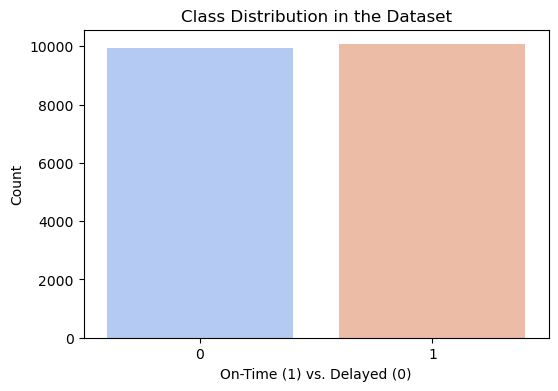

In [19]:
# Data Imbalance Check
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="coolwarm")
plt.xlabel("On-Time (1) vs. Delayed (0)")
plt.ylabel("Count")
plt.title("Class Distribution in the Dataset")
plt.show()

C:\Users\Abhinay\AppData\Local\Temp\ipykernel_14572\2599681934.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=origin_airport_delays.index, y=origin_airport_delays.values, palette="magma")


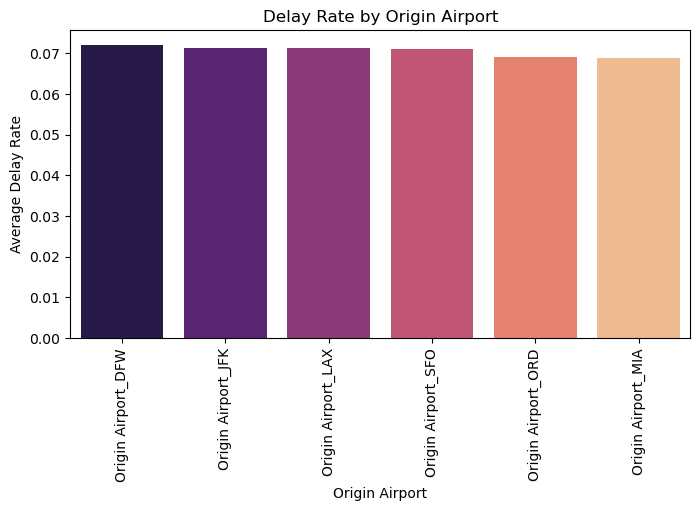

In [20]:
# Extract only the columns related to Origin Airports
origin_airport_columns = [col for col in X.columns if "Origin Airport_" in col]

# Calculate the average delay rate per origin airport
origin_airport_delays = X[origin_airport_columns].multiply(1 - y, axis=0).mean().sort_values(ascending=False)

# Plot delays by origin airport
plt.figure(figsize=(8, 4))
sns.barplot(x=origin_airport_delays.index, y=origin_airport_delays.values, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("Origin Airport")
plt.ylabel("Average Delay Rate")
plt.title("Delay Rate by Origin Airport")
plt.show()



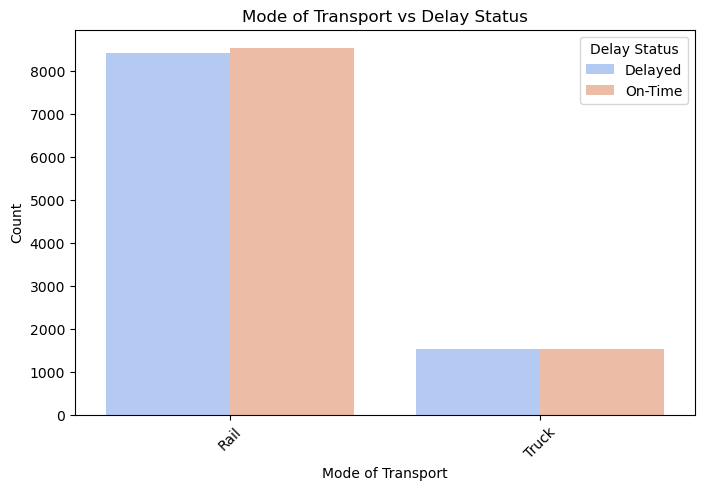

In [21]:

# Create a new column for Mode of Transport by checking which transport type is 1
df["Mode of Transport"] = df[["Mode of Transport_Rail", "Mode of Transport_Truck"]].idxmax(axis=1)

# Replace column names with readable values
df["Mode of Transport"] = df["Mode of Transport"].replace({
    "Mode of Transport_Rail": "Rail",
    "Mode of Transport_Truck": "Truck"
})

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Mode of Transport"], hue=df["Delay Status_On-Time"], palette="coolwarm")
plt.xlabel("Mode of Transport")
plt.ylabel("Count")
plt.title("Mode of Transport vs Delay Status")
plt.legend(title="Delay Status", labels=["Delayed", "On-Time"])
plt.xticks(rotation=45)
plt.show()


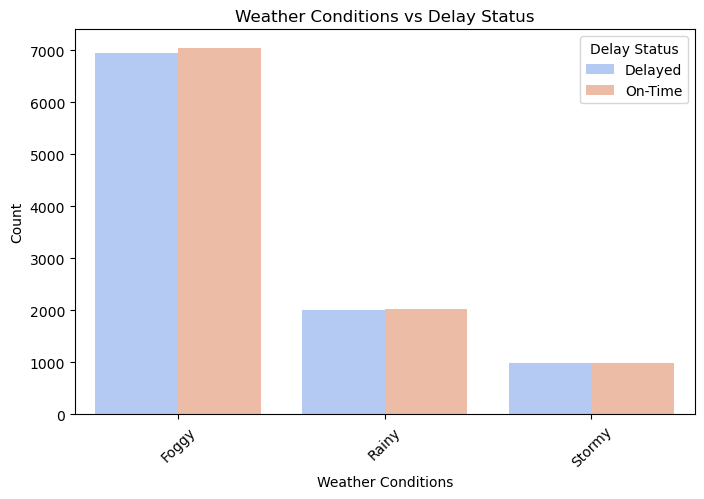

In [22]:

df["Weather Conditions"] = df[
    ["Weather Conditions_Foggy", "Weather Conditions_Rainy", "Weather Conditions_Stormy"]
].idxmax(axis=1)

# Replace column names with readable values
df["Weather Conditions"] = df["Weather Conditions"].replace({
    "Weather Conditions_Foggy": "Foggy",
    "Weather Conditions_Rainy": "Rainy",
    "Weather Conditions_Stormy": "Stormy"
})

# Plot Weather Conditions vs Delay Status
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Weather Conditions"], hue=df["Delay Status_On-Time"], palette="coolwarm")
plt.xlabel("Weather Conditions")
plt.ylabel("Count")
plt.title("Weather Conditions vs Delay Status")
plt.legend(title="Delay Status", labels=["Delayed", "On-Time"])
plt.xticks(rotation=45)
plt.show()
